# Time Series Analysis

### Time Series Data
**Definition**: Univariate Time Series is a set of values of the **same** variable taken at different point of time.<br>
**To clarify more**<br>
How is it different from what we have done till now.<br>

1) In Linear Regression:<br>
Y = a$X_{1}$ + b$X_{2}$ + c
    Here Y is the dependent variable and
    X1,X2 and X3 are the independent Variable.
    
Whereas, here we don't have the concept of independent and dependent. Now we will deal with the expressions like:<br>
$Y_{t:2}$ = a$Y_{t:1}$ + b$Y_{t:0}$
Here the variable is dependent on itself at the previous time period(s)

2) Cross-sectional data is the type of data which consists of many variables (such as profit, inflation, investment) to determine the value of share at one point of time.

Whereas, here we are looking at only one variable at different point of time. E.g Stock prices for google on each day

**Two major aspects of Time Series of Data - Trend and Seasonality**  <br>

**Trend**: A trend exists when data is increasing or decreasing in long term. <br>

**Seasonality**: A seasonality exists when the data fluctuates with the fixed period of time. For e.g. quarter of a year, month or a day of week. Generally it repeats itself over a long period of time<br>

Let us see how the trend and seasonality looks

In [62]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib.pylab import plt

#Load the data
AirPassengers = pd.read_csv("AirPassengers.csv")
#Change the index
AirPassengers = AirPassengers.set_index('Month')

#Change the column name
AirPassengers = AirPassengers.rename(columns={"#Passengers": "travellers"})

#Looking at the data
#AirPassengers.head()

The following plot has increasing trend year over year. Also, it has a periodic pattern which of rising and falling which is called seasonality.

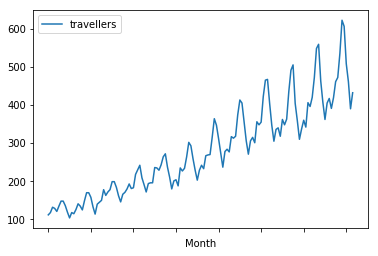

In [63]:
#Plotting the data to analyse the trend and Seasonality
AirPassengers.plot()
plt.show()

### Time Series Analysis

Now that we know what is meant by Time Series data, let us look at why do we analyse the time series data:
1. Identifying patterns in data
2. Forecasting

**For the analysis, we need Stationary Time Series.** Let us see what is meant by stationary time series.
There are three basic qualities of the stationary time series. <br>

  a. The mean of the time series should not be a function of time <br>
  b. The variance of the time series should not be a function of time <br>
  c. The covariance should not be the function of time <br>

Let us do stationary check in the Air Passenger data above.The below 2 plots show that the mean and variance are time dependent. Hence it is not stationary time series.

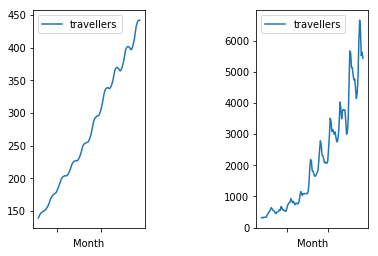

In [64]:
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(wspace=1)

#Checking the variablity in mean
AirPassengers.rolling(window = 30).mean().plot(ax=axs[0])

#Checking the variablity in variance
AirPassengers.rolling(window = 20).var().plot(ax=axs[1])
plt.figure(figsize=(20,20))
plt.show()

### How to make a time series Stationary?

We can make the time series stationary by doing transformations and differences. <br>
We will look at couple ways below and see which ones work on this data. 

Note: 
The techqniques can differ based on the dataset. <br>
We should be able to trace back all the transformations we do on the data, to get the original data.
You can see the original data on the right and compare with the transformed data on the left, to see how the series is changing.

** 1) Taking the Log Transformation ** : The variance in data seems controlled and same for all time periods

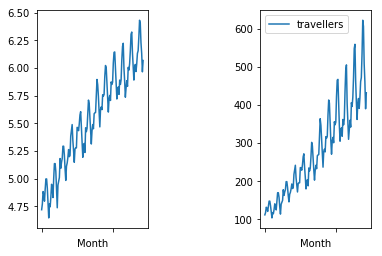

In [122]:
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(wspace=1)

#Log transformation of the travellers data
travellers_log_transformed = AirPassengers.travellers.apply(lambda y: np.log(y))
travellers_log_transformed.plot(ax=axs[0])

#Original Data
AirPassengers.plot(ax=axs[1])

** 2) Differencing ** - We still need to get rid of the trend. Below shows 3 ways in which diferrencing can be performed. <br>
a. Difference with the mean of a specific window size <br>
b. Difference with the (t-1) value <br>
c. Difference with the regression fit values.<br>

Here we see the difference with the mean gives a nice stationary time series. Hence we will use it for further analysis.

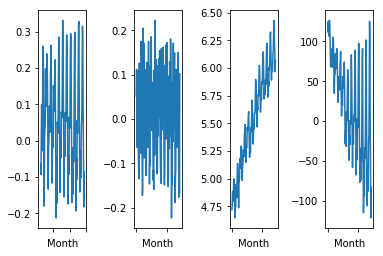

In [123]:
from statsmodels.regression.linear_model import OLS

fig, axs = plt.subplots(1,4)
fig.subplots_adjust(wspace=1)

#Log transformation of the travellers data
travellers_log_transformed = AirPassengers.travellers.apply(lambda y: np.log(y))
travellers_log_transformed.plot(ax=axs[2])

# Differencing - 1 : Difference with the mean
sliding_mean = travellers_log_transformed.rolling(window = 12).mean()
travellers_log_detrended_diff1 = travellers_log_transformed - sliding_mean
travellers_log_detrended_diff1.plot(ax=axs[0])

# Differencing - 2 :  Difference with the time lag = 1
travellers_log_detrended_diff2 = travellers_log_transformed - travellers_log_transformed.shift()
travellers_log_detrended_diff2.plot(ax=axs[1])

# Differencing - 3 :Difference with Linear Regression Fit
#Creating the linear fit out of the data provided
Y = AirPassengers.travellers
X = range(len(Y))
linear_model = OLS(Y,list(X))
linear_fit = linear_model.fit()
y_pred = linear_fit.predict(range(len(Y)))
#Calculating the difference 
diff_3 = Y - y_pred
pd.Series(diff_3, index = Y.index).plot(ax=axs[3])

To see if there is a trend exist

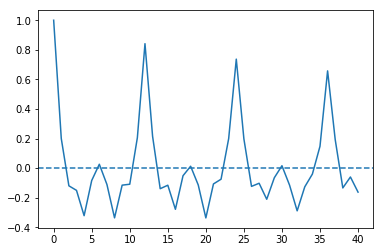

In [128]:
from statsmodels.tsa import stattools

travellers_log_detrended_diff2.dropna(inplace=True)
autoCorr = stattools.acf(travellers_log_detrended_diff2)
plt.plot(autoCorr)
plt.axhline(y=0,linestyle='--')